In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("../../data/quarterly_data.csv", encoding = 'unicode_escape')

In [2]:
df1 = df.replace("..", np.nan)

In [3]:
df2 = df1.iloc[:, 2:].apply(pd.to_numeric).interpolate(axis=1)

In [4]:
df3 = pd.concat([df1.iloc[:, :2], df2], axis=1)

In [31]:
df3.shape

(10074, 48)

In [40]:
df3 = pd.concat([df3.iloc[:, :2], df3.iloc[:, -6:]], axis=1)

In [71]:
df3.shape

(10074, 8)

In [51]:
df4 = df3.dropna(thresh=3)

In [73]:
df5.shape

(3382, 8)

In [52]:
df5 = df3.dropna(thresh=3)

In [53]:
df_use = df3.dropna(thresh=3)

In [97]:
df_use

,Postal code,Building type,2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2),label6,Location
2,00100,"Blocks of flats, three-room flat+",7205.000000,6678.000000,7178.000000,7405.000000,8053.0,8174.0,0,Helsinki Keskusta - Etu-Töölö (Helsinki )
8,00120,"Blocks of flats, three-room flat+",7607.000000,8060.000000,8258.000000,8146.000000,8559.0,8389.0,0,Punavuori (Helsinki )
14,00130,"Blocks of flats, three-room flat+",6101.000000,6101.000000,6101.000000,6101.000000,6101.0,6101.0,0,Kaartinkaupunki (Helsinki )
20,00140,"Blocks of flats, three-room flat+",8232.000000,9291.000000,8590.000000,9001.000000,9646.0,9736.0,0,Kaivopuisto - Ullanlinna (Helsinki )
26,00150,"Blocks of flats, three-room flat+",8860.000000,8268.500000,7677.000000,8375.000000,10117.0,9355.0,0,Eira - Hernesaari (Helsinki )
32,00160,"Blocks of flats, three-room flat+",6875.000000,8454.000000,7128.000000,6858.000000,7991.0,6819.0,0,Katajanokka (Helsinki )
38,00170,"Blocks of flats, three-room flat+",7039.000000,7024.000000,7523.000000,7343.000000,7810.0,7759.0,0,Kruununhaka (Helsinki )
44,00180,"Blocks of flats, three-room flat+",6805.000000,7944.000000,8031.000000,8118.000000,7738.0,7738.0,0,Kamppi - Ruoholahti (Helsinki )
56,00200,"Blocks of flats, three-room flat+",6443.000000,6207.000000,6259.000000,6462.000000,6673.0,6805.0,0,Lauttasaari (Helsinki )
62,00210,"Blocks of flats, three-room flat+",6497.000000,6606.000000,6727.000000,6883.000000,6894.0,7324.0,0,Vattuniemi (Helsinki )


In [54]:
df4 = df4.melt(id_vars=["Postal code", "Building type"],var_name="Quarter", value_name="EUR/m2")

In [55]:
### Regex to change quarters to datetime
import datetime as date

def quarter_to_datetime(row):
    dates = {"Q1": "1/1", "Q2":"4/1", "Q3":"7/1", "Q4":"10/1"}
    string = row.replace("*", "").split(" ")[0]
    year, quarter = string[:4], string[4:]
    datetime_str = dates[quarter] + "/" + year
    return date.datetime.strptime(datetime_str, '%d/%m/%Y')
    
    
df4["Quarter"] = df4["Quarter"].apply(lambda row: quarter_to_datetime(row))
df4

,Postal code,Building type,Quarter,EUR/m2
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",2020-01-01,7802.000000
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",2020-01-01,7573.000000
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",2020-01-01,7205.000000
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,2020-01-01,7460.000000
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Building types total,2020-01-01,7460.000000
5,00120 Punavuori (Helsinki ),"Blocks of flats, one-room flat",2020-01-01,7959.000000
6,00120 Punavuori (Helsinki ),"Blocks of flats, two-room flat",2020-01-01,7331.000000
7,00120 Punavuori (Helsinki ),"Blocks of flats, three-room flat+",2020-01-01,7607.000000
8,00120 Punavuori (Helsinki ),Blocks of flats total,2020-01-01,7962.500000
9,00120 Punavuori (Helsinki ),Building types total,2020-01-01,7726.000000


In [56]:
### Split postal code and place

df4[['Postal code', 'Location']] = df4['Postal code'].str.split(' ', 1, expand=True)
df4

,Postal code,Building type,Quarter,EUR/m2,Location
0,00100,"Blocks of flats, one-room flat",2020-01-01,7802.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
1,00100,"Blocks of flats, two-room flat",2020-01-01,7573.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
2,00100,"Blocks of flats, three-room flat+",2020-01-01,7205.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
3,00100,Blocks of flats total,2020-01-01,7460.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
4,00100,Building types total,2020-01-01,7460.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
5,00120,"Blocks of flats, one-room flat",2020-01-01,7959.000000,Punavuori (Helsinki )
6,00120,"Blocks of flats, two-room flat",2020-01-01,7331.000000,Punavuori (Helsinki )
7,00120,"Blocks of flats, three-room flat+",2020-01-01,7607.000000,Punavuori (Helsinki )
8,00120,Blocks of flats total,2020-01-01,7962.500000,Punavuori (Helsinki )
9,00120,Building types total,2020-01-01,7726.000000,Punavuori (Helsinki )


In [57]:
import pgeocode
import time

In [12]:
"""def postal_code_to_geolocation(row):
    nomi = pgeocode.Nominatim('fi')
    location = nomi.query_postal_code(postal_code)
    return location.latitude, location.longitude"""

"def postal_code_to_geolocation(row):\n    nomi = pgeocode.Nominatim('fi')\n    location = nomi.query_postal_code(postal_code)\n    return location.latitude, location.longitude"

In [13]:
"""geolocation_dic = {}

latitude, longitude = postal_code_to_geolocation()
print(latitude)
geolocation_dic[p] = (latitude, longitude)
time.sleep(10)"""

'geolocation_dic = {}\n\nlatitude, longitude = postal_code_to_geolocation()\nprint(latitude)\ngeolocation_dic[p] = (latitude, longitude)\ntime.sleep(10)'

In [14]:
postal_code_list = list(df4["Postal code"].unique())
nomi = pgeocode.Nominatim('fi')
location = nomi.query_postal_code(postal_code_list)

In [15]:
###. WORK IN PROGRESS (93999 FOR KUUSAMO)
# THIS HAS TO BE ADDED MANUALLY

wanted_features_location = location[["postal_code", 
                                     "place_name", 
                                     "state_name", 
                                     "county_name", 
                                     "latitude", 
                                     "longitude"]]
wanted_features_location = wanted_features_location.rename(columns={"postal_code": "Postal code"})

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
 

## Clustering experiment

In [58]:
df5

,Postal code,Building type,2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2)
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",7802.000000,8543.000000,9170.000000,7517.000000,8872.0,8596.0
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",7573.000000,7398.000000,7868.000000,7700.000000,7829.0,7974.0
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",7205.000000,6678.000000,7178.000000,7405.000000,8053.0,8174.0
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,7460.000000,7275.000000,8058.000000,7540.000000,8188.0,8188.0
5,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Building types total,7460.000000,7275.000000,8058.000000,7540.000000,8188.0,8188.0
6,00120 Punavuori (Helsinki ),"Blocks of flats, one-room flat",7959.000000,8230.000000,9132.000000,9132.000000,9132.0,9132.0
7,00120 Punavuori (Helsinki ),"Blocks of flats, two-room flat",7331.000000,8389.000000,7794.000000,8121.000000,8931.0,8585.0
8,00120 Punavuori (Helsinki ),"Blocks of flats, three-room flat+",7607.000000,8060.000000,8258.000000,8146.000000,8559.0,8389.0
9,00120 Punavuori (Helsinki ),Blocks of flats total,7962.500000,8216.000000,8393.000000,8393.000000,8393.0,8393.0
11,00120 Punavuori (Helsinki ),Building types total,7726.000000,8216.000000,8393.000000,8411.000000,8812.0,8856.0


In [59]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df5.iloc[:, 2:])
sc = pd.DataFrame(scaled_features)
sc = sc.fillna(axis=1, method="bfill")

In [60]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [61]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sc)
    sse.append(kmeans.inertia_)

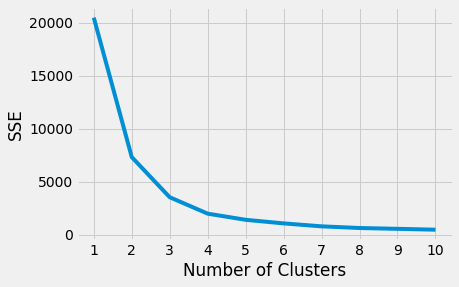

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [63]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sc)
    score = silhouette_score(sc, kmeans.labels_)
    silhouette_coefficients.append(score)

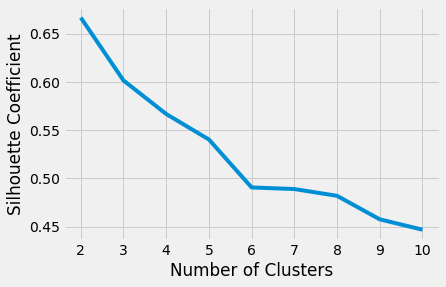

In [64]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [110]:
one = df5[df5["Building type"] == "Blocks of flats, one-room flat"]
two = df5[df5["Building type"] == "Blocks of flats, two-room flat"]
three = df5[df5["Building type"] == "Blocks of flats, three-room flat+"]
total = df5[df5["Building type"] == "Blocks of flats total"]

In [68]:
df_list = [one, two, three, total]
inertia = []

for df in df_list:
    dfin = df.iloc[:, -6:]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(dfin)
    sc = pd.DataFrame(scaled_features)
    sc = sc.fillna(axis=1, method="bfill")
    
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(sc)
        sse.append(kmeans.inertia_)
    inertia.append(sse)

In [69]:
inrt = pd.DataFrame(np.array(inertia).T, columns = ["one", "two", "three", "total"])

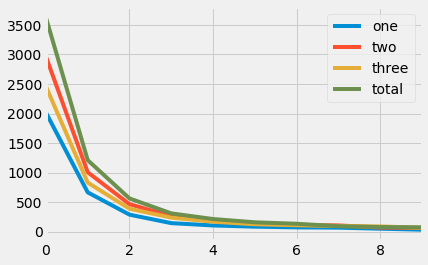

In [70]:
inrt.plot()

In [111]:
df_list = [one, two, three]
inertia = []

for df in df_list:
    dfin = df.iloc[:, -6:]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(dfin)
    sc = pd.DataFrame(scaled_features)
    sc = sc.fillna(axis=1, method="bfill")
    
    kmeans = KMeans(n_clusters=6, **kmeans_kwargs)
    kmeans.fit(sc)
    col_name = "label" + str(6)
    df[col_name] = kmeans.labels_

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [112]:
df_list = [one, two, three]
inertia = []

for df in df_list:
    dfin = df.iloc[:, -6:]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(dfin)
    sc = pd.DataFrame(scaled_features)
    sc = sc.fillna(axis=1, method="bfill")
    
    kmeans = KMeans(n_clusters=8, **kmeans_kwargs)
    kmeans.fit(sc)
    col_name = "label" + str(8)
    df[col_name] = kmeans.labels_

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [113]:
df_list = [one, two, three]
inertia = []

for df in df_list:
    dfin = df.iloc[:, -6:]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(dfin)
    sc = pd.DataFrame(scaled_features)
    sc = sc.fillna(axis=1, method="bfill")
    
    kmeans = KMeans(n_clusters=10, **kmeans_kwargs)
    kmeans.fit(sc)
    col_name = "label" + str(10)
    df[col_name] = kmeans.labels_

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [91]:
df_use[['Postal code', 'Location']] = df_use['Postal code'].str.split(' ', 1, expand=True)
df_use = pd.merge(df_use, wanted_features_location, on="Postal code")

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [114]:
new_list = []
for df_use in df_list:
    df_use[['Postal code', 'Location']] = df_use['Postal code'].str.split(' ', 1, expand=True)
    new_list.append(pd.merge(df_use, wanted_features_location, on="Postal code"))

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


No handles with labels found to put in legend.


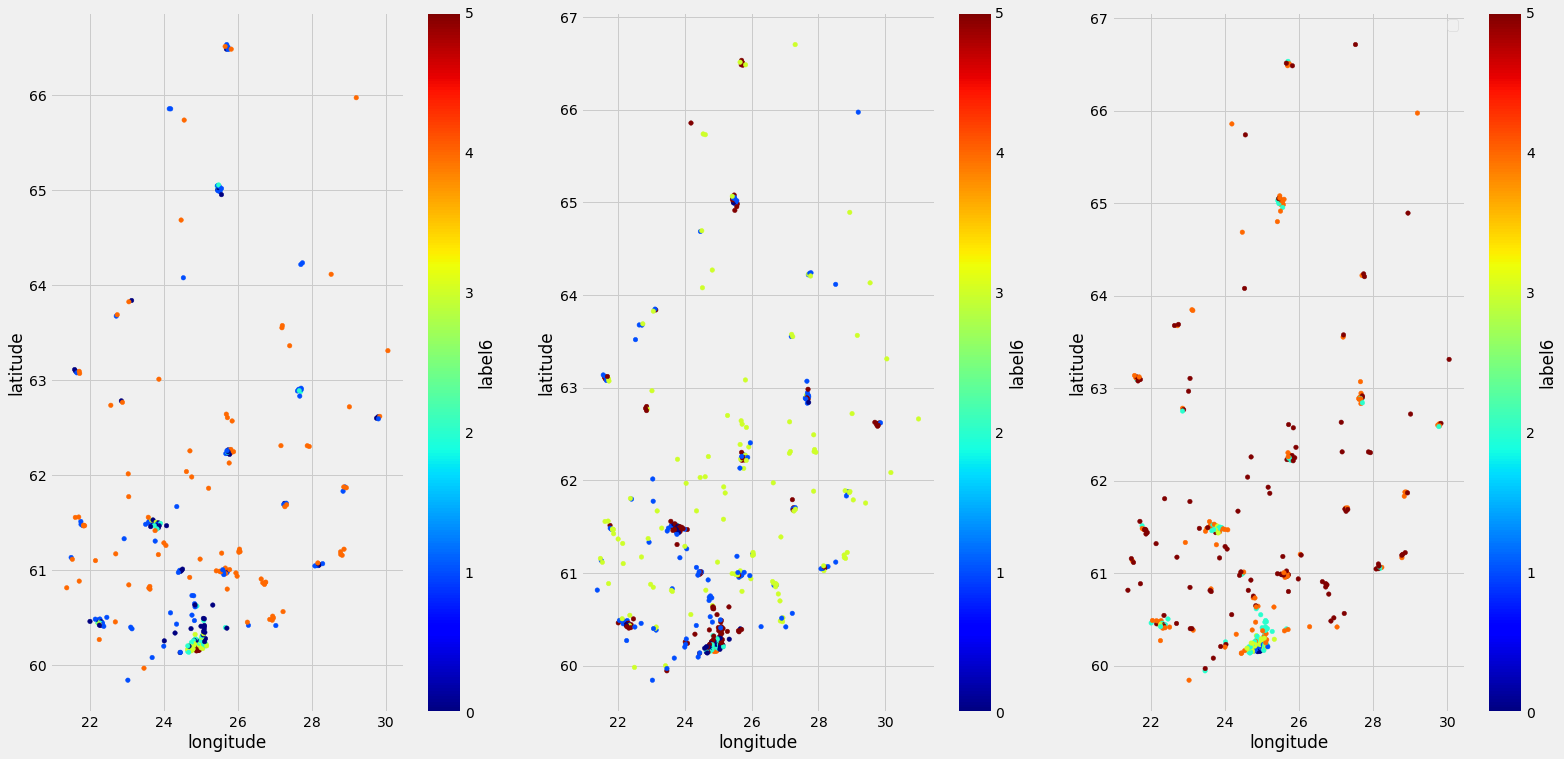

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 12))

new_list[0].plot(ax = ax1, kind="scatter", x="longitude", y="latitude", alpha=1,
 c="label6", cmap=plt.get_cmap("jet"), colorbar=True,
)
new_list[1].plot(ax = ax2, kind="scatter", x="longitude", y="latitude", alpha=1,
 c="label6", cmap=plt.get_cmap("jet"), colorbar=True,
)
new_list[2].plot(ax = ax3, kind="scatter", x="longitude", y="latitude", alpha=1,
 c="label6", cmap=plt.get_cmap("jet"), colorbar=True,
)

plt.legend()

In [116]:
one

,Postal code,Building type,2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2),label6,label8,label10,Location
0,00100,"Blocks of flats, one-room flat",7802.000000,8543.000000,9170.000000,7517.000000,8872.00,8596.0,5,5,9,Helsinki Keskusta - Etu-Töölö (Helsinki )
6,00120,"Blocks of flats, one-room flat",7959.000000,8230.000000,9132.000000,9132.000000,9132.00,9132.0,5,5,9,Punavuori (Helsinki )
18,00140,"Blocks of flats, one-room flat",9509.000000,9464.000000,9309.000000,9154.000000,9177.00,9177.0,5,5,9,Kaivopuisto - Ullanlinna (Helsinki )
24,00150,"Blocks of flats, one-room flat",8663.000000,8177.000000,9316.000000,8790.000000,9001.00,9420.0,5,5,9,Eira - Hernesaari (Helsinki )
30,00160,"Blocks of flats, one-room flat",8151.666667,8280.111111,8408.555556,8537.000000,8327.00,8327.0,5,5,9,Katajanokka (Helsinki )
36,00170,"Blocks of flats, one-room flat",8997.000000,8325.000000,8656.000000,9414.000000,7987.00,8593.0,5,5,9,Kruununhaka (Helsinki )
42,00180,"Blocks of flats, one-room flat",8614.000000,8809.000000,9004.000000,9211.000000,9418.00,8684.0,5,5,9,Kamppi - Ruoholahti (Helsinki )
54,00200,"Blocks of flats, one-room flat",7231.250000,7379.500000,7527.750000,7676.000000,7676.00,7676.0,5,5,9,Lauttasaari (Helsinki )
60,00210,"Blocks of flats, one-room flat",6709.461538,6779.307692,6849.153846,6919.000000,5885.00,5885.0,5,5,9,Vattuniemi (Helsinki )
78,00250,"Blocks of flats, one-room flat",7047.000000,7887.000000,8026.000000,7173.000000,7759.00,8472.0,5,5,9,Taka-Töölö (Helsinki )


In [117]:
one.to_csv("oneroom.csv")
two.to_csv("tworoom.csv")
three.to_csv("threeroom.csv")

In [ ]:
df6 = df5.iloc[:, 2:]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df6)
sc = pd.DataFrame(scaled_features)
sc = sc.fillna(axis=1, method="bfill")

In [ ]:
for k in [3,6,9]:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sc)
    col_name = "label" + str(k)
    df_use[col_name] = kmeans.labels_

In [81]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sc)
    col_name = "label" + str(k)
    df_use[col_name] = kmeans.labels_

In [86]:
df_use

,Postal code,Building type,2010Q1 Price per square meter (EUR/m2),2010Q2 Price per square meter (EUR/m2),2010Q3 Price per square meter (EUR/m2),2010Q4 Price per square meter (EUR/m2),2011Q1 Price per square meter (EUR/m2),2011Q2 Price per square meter (EUR/m2),2011Q3 Price per square meter (EUR/m2),2011Q4 Price per square meter (EUR/m2),...,state_name,county_name,latitude,longitude,label2,label4,label5,label7,label8,label10
0,00100,"Blocks of flats, one-room flat",5458.0,5347.000000,5826.000000,5566.000000,5545.000000,5812.000000,5909.000000,5856.000000,...,Uusimaa,Helsinki,60.1714,24.9316,0,0,3,0,0,0
1,00100,"Blocks of flats, two-room flat",5164.0,5021.000000,5081.000000,5006.000000,5713.000000,5866.000000,5552.000000,5614.000000,...,Uusimaa,Helsinki,60.1714,24.9316,0,0,3,0,0,0
2,00100,"Blocks of flats, three-room flat+",4944.0,5396.000000,4828.000000,5394.000000,5571.000000,5709.000000,5450.000000,5010.000000,...,Uusimaa,Helsinki,60.1714,24.9316,0,0,3,0,0,0
3,00100,Blocks of flats total,5168.0,5219.000000,5181.000000,5269.000000,5632.000000,5807.000000,5630.000000,5511.000000,...,Uusimaa,Helsinki,60.1714,24.9316,0,0,3,0,0,0
4,00100,Building types total,5168.0,5219.000000,5181.000000,5269.000000,5632.000000,5807.000000,5630.000000,5511.000000,...,Uusimaa,Helsinki,60.1714,24.9316,0,0,3,0,0,0
5,00120,"Blocks of flats, one-room flat",5515.0,5646.000000,5395.000000,5613.000000,5905.000000,6332.000000,6160.000000,5988.000000,...,Uusimaa,Helsinki,60.1632,24.9391,0,0,3,0,0,0
6,00120,"Blocks of flats, two-room flat",5349.0,5355.000000,5534.000000,5321.000000,5528.000000,5523.000000,5284.000000,5045.000000,...,Uusimaa,Helsinki,60.1632,24.9391,0,0,3,0,0,0
7,00120,"Blocks of flats, three-room flat+",6236.0,5713.000000,5884.000000,5666.000000,5691.000000,5571.000000,5512.000000,5317.000000,...,Uusimaa,Helsinki,60.1632,24.9391,0,0,3,0,0,0
8,00120,Blocks of flats total,5618.0,5495.000000,5595.000000,5521.000000,5689.000000,5749.000000,5518.000000,5471.000000,...,Uusimaa,Helsinki,60.1632,24.9391,0,0,3,0,0,0
9,00120,Building types total,5618.0,5495.000000,5595.000000,5521.000000,5689.000000,5749.000000,5518.000000,5471.000000,...,Uusimaa,Helsinki,60.1632,24.9391,0,0,3,0,0,0


In [85]:
df_use.to_csv("cluster.csv")

In [21]:
sc["label"] = kmeans.labels_

In [22]:
df5["label"] = kmeans.labels_

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df5[['Postal code', 'Location']] = df5['Postal code'].str.split(' ', 1, expand=True)

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [25]:
df6 = pd.merge(df5, wanted_features_location, on="Postal code")

No handles with labels found to put in legend.


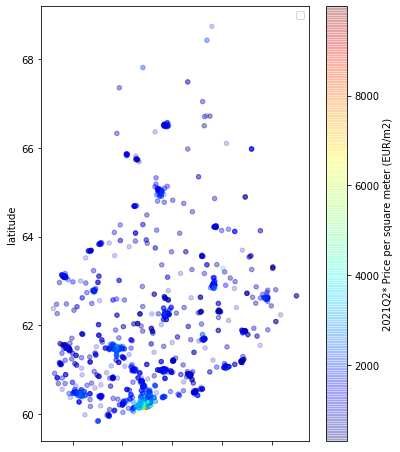

In [26]:
df6.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(6,8),
 c="2021Q2* Price per square meter (EUR/m2)", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


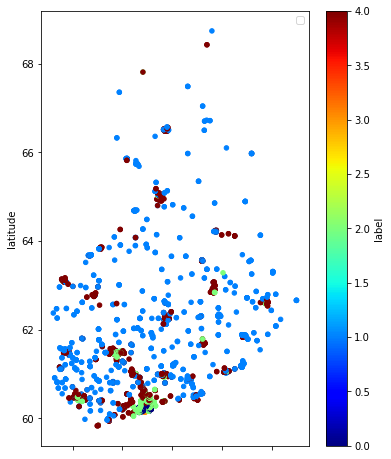

In [27]:
df6.plot(kind="scatter", x="longitude", y="latitude", alpha=1, figsize=(6,8),
 c="label", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Value of square meter of cities Q2 2021

In [74]:
Q2_2021__one_room = df_merge[(df_merge["Quarter"] == "2021-01-04") & (df_merge["Building type"] == "Blocks of flats, one-room flat")]


In [75]:
Q2_2021__one_room

,Postal code,Building type,Quarter,EUR/m2,Location,place_name,state_name,county_name,latitude,longitude
270,00100,"Blocks of flats, one-room flat",2021-01-04,8596.000000,Helsinki Keskusta - Etu-Töölö (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1714,24.9316
546,00120,"Blocks of flats, one-room flat",2021-01-04,8549.699924,Punavuori (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1632,24.9391
822,00130,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Kaartinkaupunki (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1645,24.9487
1098,00140,"Blocks of flats, one-room flat",2021-01-04,10025.116718,Kaivopuisto - Ullanlinna (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1578,24.9525
1374,00150,"Blocks of flats, one-room flat",2021-01-04,9420.000000,Eira - Hernesaari (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1570,24.9369
...,...,...,...,...,...,...,...,...,...,...
462294,99830,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Saariselkä (Inari ),Saariselkä,Lapland,Pohjois-Lappi,68.4230,27.3965
462570,99870,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Inari Keskus-Lemmenjoki (Inari ),Inari,Lapland,Pohjois-Lappi,68.9287,26.9896
462846,99930,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Sevettijärvi-Näätämö (Inari ),Sevettijärvi,Lapland,Pohjois-Lappi,69.4918,28.5786
463122,99950,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Karigasniemi (Utsjoki ),Karigasniemi,Lapland,Pohjois-Lappi,69.4729,25.9527


No handles with labels found to put in legend.


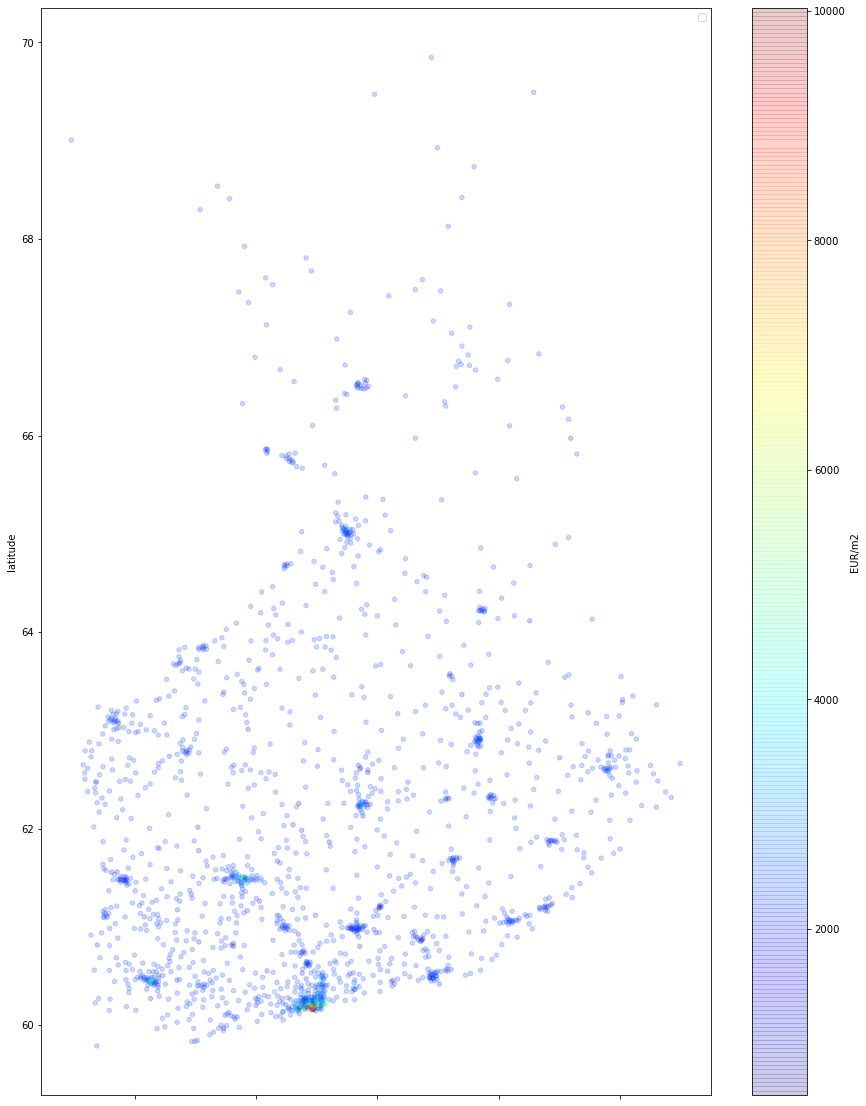

In [84]:
Q2_2021__one_room.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(15,20),
 c="EUR/m2", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()